In [45]:
#import library for use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import urllib.request
import scipy as sp
import statsmodels.api as sm
from scipy.stats import norm, skew
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor




In [4]:
#import dataframe
train_label=pd.read_csv('train_label.csv')
train_base=pd.read_csv('train_base.csv')
train_op=pd.read_csv('train_op.csv')
train_trans=pd.read_csv('train_trans.csv')

# part1: EDA
## get basic data information and distribution

In [9]:
#first checking the type then the missing value
train_label.info()
train_base.info()
train_op.info()
train_trans.info()
train_label.head()
train_base.head()
#train_op.head()
#train_trans.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47782 entries, 0 to 47781
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   user    47782 non-null  object
 1   label   47782 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 746.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47782 entries, 0 to 47781
Data columns (total 46 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user               47782 non-null  object
 1   sex                47568 non-null  object
 2   age                47782 non-null  int64 
 3   provider           47782 non-null  object
 4   level              47782 non-null  object
 5   verified           47782 non-null  object
 6   using_time         47782 non-null  int64 
 7   regist_type        47782 non-null  object
 8   card_a_cnt         47782 non-null  int64 
 9   card_b_cnt         47782 non-null  int64 
 10  card_c_cnt        

,user,sex,age,provider,level,verified,using_time,regist_type,card_a_cnt,card_b_cnt,...,service3,service3_level,product1_amount,product2_amount,product3_amount,product4_amount,product5_amount,product6_amount,product7_cnt,product7_fail_cnt
0,Train_06800,category 1,24877,category 0,category 2,category 0,24728,category 1,24712,24712,...,category 0,NaN,level 1,level 1,level 1,level 0,level 0,level 1,24706,24706
1,Train_23487,category 1,24895,category 0,category 2,category 0,24719,category 1,24719,24719,...,category 0,NaN,level 1,level 1,level 1,level 0,level 0,level 1,24712,24706
2,Train_36880,category 0,24853,category 0,category 2,category 0,24723,category 1,24719,24719,...,category 0,NaN,level 1,level 1,level 1,level 0,level 0,level 1,24712,24706
3,Train_35392,category 0,24938,category 1,category 1,category 0,24707,category 3,24712,24712,...,category 0,NaN,level 1,level 1,level 1,level 0,level 0,level 1,24712,24706
4,Train_35057,category 0,24956,category 0,category 2,category 0,24728,category 2,24719,24712,...,category 0,NaN,level 2,level 8,level 1,level 0,level 0,level 1,24712,24706


In [14]:
#check the missing data first and find reason why
train_base.isna().sum()

user                     0
sex                    214
age                      0
provider                 0
level                    0
verified                 0
using_time               0
regist_type              0
card_a_cnt               0
card_b_cnt               0
card_c_cnt               0
agreement1               0
op1_cnt                  0
op2_cnt                  0
card_d_cnt               0
agreement_total          0
service1_cnt             0
service1_amt             0
service2_cnt             0
agreement2               0
agreement3               0
agreement4               0
acc_count                0
login_cnt_period1        0
login_cnt_period2        0
ip_cnt                   0
login_cnt_avg            0
login_days_cnt           0
province                 0
city                     0
balance                  0
balance_avg            294
balance1                 0
balance1_avg           294
balance2                 0
balance2_avg             0
service3                 0
s

In [21]:
#assume the missing of balance_average is caused by balance1_average
train_base[pd.isnull(train_base['balance_avg'])]['balance1_avg'].value_counts()
train_base['sex'].value_counts()
#got the proportion, but no relationship informed about filling missing data, deal with no information

category 0    36780
category 1    10788
Name: sex, dtype: int64

In [27]:
#the missing data of service3_level is massive and all of them belongs to service category0
#based on the original proportion,category0 lead to the missing of service3_level
service=['service3','service3_level']
service_pro=train_base[pd.isnull(train_base['service3_level'])][service]
service_pro['service3'].value_counts()
train_base['service3'].value_counts()
train_base['service3_level'].value_counts()

category 0    1854
category 1     881
category 2     840
category 3     358
Name: service3_level, dtype: int64

In [28]:
train_base['balance1_avg'].value_counts()
#due to proportion, may fill the blank with level 1, still need to decode the calculation process of balance avg

level 1     25394
level 21     1596
level 20     1260
level 19     1170
level 13     1166
level 18     1149
level 17     1145
level 16     1133
level 8      1115
level 11     1099
level 15     1096
level 10     1093
level 2      1068
level 12     1065
level 14     1054
level 3      1054
level 5       979
level 7       976
level 6       965
level 4       959
level 9       952
Name: balance1_avg, dtype: int64

### Numerical data:

In [29]:
train_base.columns

Index(['user', 'sex', 'age', 'provider', 'level', 'verified', 'using_time',
       'regist_type', 'card_a_cnt', 'card_b_cnt', 'card_c_cnt', 'agreement1',
       'op1_cnt', 'op2_cnt', 'card_d_cnt', 'agreement_total', 'service1_cnt',
       'service1_amt', 'service2_cnt', 'agreement2', 'agreement3',
       'agreement4', 'acc_count', 'login_cnt_period1', 'login_cnt_period2',
       'ip_cnt', 'login_cnt_avg', 'login_days_cnt', 'province', 'city',
       'balance', 'balance_avg', 'balance1', 'balance1_avg', 'balance2',
       'balance2_avg', 'service3', 'service3_level', 'product1_amount',
       'product2_amount', 'product3_amount', 'product4_amount',
       'product5_amount', 'product6_amount', 'product7_cnt',
       'product7_fail_cnt'],
      dtype='object')

In [34]:
num_var=['age','card_a_cnt', 'card_b_cnt', 'card_c_cnt','card_d_cnt','op1_cnt', 'op2_cnt','agreement_total','service1_cnt',
       'service1_amt', 'service2_cnt','acc_count', 'login_cnt_period1', 'login_cnt_period2','ip_cnt', 'login_cnt_avg', 'login_days_cnt','product7_cnt',
       'product7_fail_cnt']


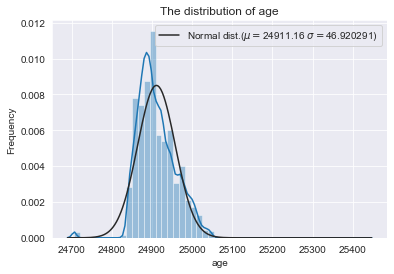

In [37]:
sns.set_style('darkgrid')
sns.distplot(train_base['age'],fit=norm)
(mu,sigma)= norm.fit(train_base['age'])
plt.legend(['Normal dist.($\mu=${:.2f} $\sigma=${:2f})'.format(mu,sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('The distribution of age')
plt.show()

### Textual data

In [42]:
cols = list(train_base.columns)
num_var = []
for col in cols:
    if type(train_base[col][1]) == str:
        col = pd.crosstab(index=train_base[col], columns='count')    
        print(col)
        print('----------------')
    else:
        num_var.append(col)

col_0        count
user              
Train_00000      1
Train_00001      1
Train_00002      1
Train_00003      1
Train_00004      1
...            ...
Train_47777      1
Train_47778      1
Train_47779      1
Train_47780      1
Train_47781      1

[47782 rows x 1 columns]
----------------
col_0       count
sex              
category 0  36780
category 1  10788
----------------
col_0       count
provider         
category 0  41261
category 1   1323
category 2   5198
----------------
col_0       count
level            
category 0    241
category 1   9637
category 2  37904
----------------
col_0       count
verified         
category 0  46218
category 1   1564
----------------
col_0        count
regist_type       
category 0     147
category 1   22693
category 2    2926
category 3    9692
category 4      12
category 5       2
category 6       1
category 7   12309
----------------
col_0       count
agreement1       
category 0  47745
category 1     37
----------------
col_0       count
agre